# ML-based Diagnosis Prediction in Telemedicine Applications


In [ ]:
#importing dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import os
from sklearn.linear_model import LogisticRegression

In [3]:
#uploading dataset

In [4]:
df = pd.read_csv(r'dataset\diagnosis_dataset.csv')

In [5]:
df.head()

,Age,Gender,Systolic_BP,Diastolic_BP,Glucose_Level,BMI,Cholesterol_Level,Family_History,Label
0,62,1,150,103,254,25.210068,141,0,1
1,65,1,178,93,222,24.690708,261,1,1
2,82,1,151,102,113,41.472272,185,0,0
3,85,1,149,65,154,18.220462,201,1,1
4,85,0,164,89,261,10.060127,196,1,1


In [6]:
#data analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   int64  
 1   Gender             1000 non-null   int64  
 2   Systolic_BP        1000 non-null   int64  
 3   Diastolic_BP       1000 non-null   int64  
 4   Glucose_Level      1000 non-null   int64  
 5   BMI                1000 non-null   float64
 6   Cholesterol_Level  1000 non-null   int64  
 7   Family_History     1000 non-null   int64  
 8   Label              1000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


In [8]:
df.describe()

,Age,Gender,Systolic_BP,Diastolic_BP,Glucose_Level,BMI,Cholesterol_Level,Family_History,Label
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.144000,0.52000,133.047000,85.681000,188.044000,26.089514,199.430000,0.506000,0.682000
std,21.281404,0.49985,26.378602,15.578766,68.828944,11.856086,58.614493,0.500214,0.465932
min,18.000000,0.00000,90.000000,60.000000,70.000000,6.580611,100.000000,0.000000,0.000000
25%,35.000000,0.00000,109.750000,71.000000,127.000000,16.907008,149.000000,0.000000,0.000000
50%,53.000000,1.00000,132.000000,87.000000,191.500000,24.042785,200.000000,1.000000,1.000000
75%,71.000000,1.00000,157.000000,100.000000,250.000000,33.038171,251.250000,1.000000,1.000000
max,90.000000,1.00000,180.000000,110.000000,300.000000,64.278240,300.000000,1.000000,1.000000


In [9]:
#data Correlection

In [10]:
df.corr()

,Age,Gender,Systolic_BP,Diastolic_BP,Glucose_Level,BMI,Cholesterol_Level,Family_History,Label
Age,1.000000,-0.037065,0.035369,0.030334,0.007844,0.028130,-0.008660,-0.037318,0.030264
Gender,-0.037065,1.000000,-0.037157,0.061944,-0.015592,-0.009148,0.005241,-0.020498,-0.011347
Systolic_BP,0.035369,-0.037157,1.000000,-0.010462,0.023955,0.018131,-0.056178,-0.007190,0.021660
Diastolic_BP,0.030334,0.061944,-0.010462,1.000000,-0.043539,0.020391,0.037479,0.004934,-0.044052
Glucose_Level,0.007844,-0.015592,0.023955,-0.043539,1.000000,-0.045477,0.004225,0.005865,0.819288
BMI,0.028130,-0.009148,0.018131,0.020391,-0.045477,1.000000,0.002551,0.000515,-0.062927
Cholesterol_Level,-0.008660,0.005241,-0.056178,0.037479,0.004225,0.002551,1.000000,-0.014188,0.038293
Family_History,-0.037318,-0.020498,-0.007190,0.004934,0.005865,0.000515,-0.014188,1.000000,0.021079
Label,0.030264,-0.011347,0.021660,-0.044052,0.819288,-0.062927,0.038293,0.021079,1.000000


In [11]:
#Checking NULL values

In [12]:
df.isnull().sum()

Age                  0
Gender               0
Systolic_BP          0
Diastolic_BP         0
Glucose_Level        0
BMI                  0
Cholesterol_Level    0
Family_History       0
Label                0
dtype: int64

In [13]:
#Data Visulazation

In [14]:
labels = ['positive' , 'negative']
labels

['positive', 'negative']

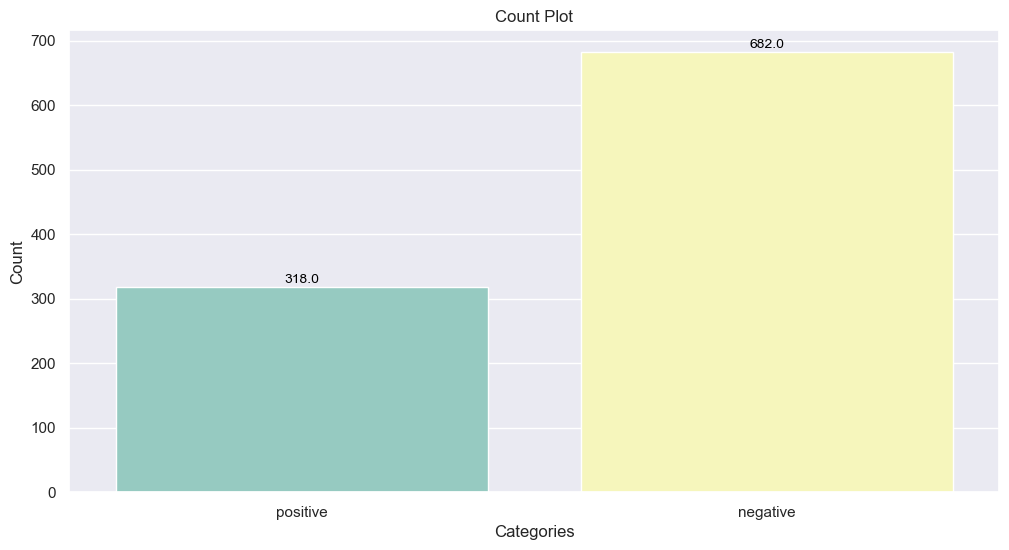

In [15]:
sns.set(style="darkgrid") 
plt.figure(figsize=(12, 6)) 
ax = sns.countplot(x=df['Label'], data=df, palette="Set3")
plt.title("Count Plot")  
plt.xlabel("Categories") 
plt.ylabel("Count") 

ax.set_xticklabels(labels)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  

In [16]:
df

,Age,Gender,Systolic_BP,Diastolic_BP,Glucose_Level,BMI,Cholesterol_Level,Family_History,Label
0,62,1,150,103,254,25.210068,141,0,1
1,65,1,178,93,222,24.690708,261,1,1
2,82,1,151,102,113,41.472272,185,0,0
3,85,1,149,65,154,18.220462,201,1,1
4,85,0,164,89,261,10.060127,196,1,1
...,...,...,...,...,...,...,...,...,...
995,50,0,142,76,99,30.093166,274,1,0
996,46,0,148,81,82,10.225292,106,1,0
997,76,1,172,62,253,17.040974,248,0,1
998,84,0,170,80,118,16.100919,229,1,0


In [17]:
#Declaring independent and dependent variable

In [18]:
x = df.drop(['Label'],axis = 1)
x.head()

,Age,Gender,Systolic_BP,Diastolic_BP,Glucose_Level,BMI,Cholesterol_Level,Family_History
0,62,1,150,103,254,25.210068,141,0
1,65,1,178,93,222,24.690708,261,1
2,82,1,151,102,113,41.472272,185,0
3,85,1,149,65,154,18.220462,201,1
4,85,0,164,89,261,10.060127,196,1


In [19]:
y = df['Label']
y

0      1
1      1
2      0
3      1
4      1
      ..
995    0
996    0
997    1
998    0
999    0
Name: Label, Length: 1000, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.10, random_state = 42)

In [21]:
x_train.shape

(900, 8)

In [22]:
y_train.shape

(900,)

In [23]:
#performance evalution

In [24]:
precision = []
recall = []
fscore = []
accuracy = []


def performance_metrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

In [25]:
# Logistic Regression model building

LogisticRegression Accuracy    : 97.0
LogisticRegression Precision   : 96.13970588235294
LogisticRegression Recall      : 96.93782141187471
LogisticRegression FSCORE      : 96.52415710809872

 LogisticRegression classification report
               precision    recall  f1-score   support

    positive       0.97      0.94      0.95        32
    negative       0.97      0.99      0.98        68

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100



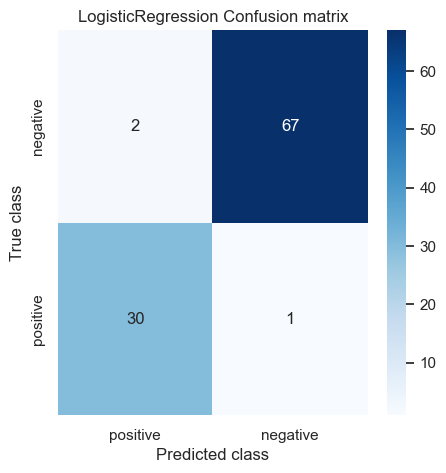

In [26]:
lr_model_path = 'model/LogisticRegression.npy'
if os.path.exists(lr_model_path):
    # Load the Logistic Regression model
    lr_classifier = np.load(lr_model_path, allow_pickle=True).item()
else:                       
    # Train and save the Logistic Regression model
    lr_classifier = LogisticRegression()
    lr_classifier.fit(x_train, y_train)
    np.save(lr_model_path, lr_classifier)

# Predict using the trained Logistic Regression model
y_pred_lr = lr_classifier.predict(x_test)

# Evaluate the Logistic Regression model
performance_metrics('LogisticRegression', y_pred_lr, y_test)

In [27]:
#Decision Tree Classifier model building

DecisionTreeClassifier Accuracy    : 100.0
DecisionTreeClassifier Precision   : 100.0
DecisionTreeClassifier Recall      : 100.0
DecisionTreeClassifier FSCORE      : 100.0

 DecisionTreeClassifier classification report
               precision    recall  f1-score   support

    positive       1.00      1.00      1.00        31
    negative       1.00      1.00      1.00        69

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



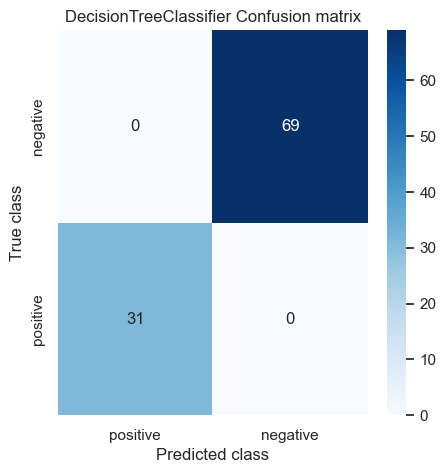

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Check if the model file exists
model_path = 'model/DecisionTreeClassifier.npy'
if os.path.exists(model_path):
    # Load the model
    classifier = np.load(model_path, allow_pickle=True).item()
else:                       
    # Train and save the model
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    np.save(model_path, classifier)

# Predict using the trained model
y_pred = classifier.predict(x_test)

# Evaluate the model
performance_metrics('DecisionTreeClassifier', y_pred, y_test)

In [29]:
#Tabular form of Performance Metrics

In [30]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Logistic Regression", "Decision Tree Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Logistic Regression,96.139706,96.937821,96.524157,97.0
1,Decision Tree Classifier,100.000000,100.000000,100.000000,100.0


In [31]:
#Uploading testing dataset

In [32]:
test=pd.read_csv("test.csv")
test

,Age,Gender,Systolic_BP,Diastolic_BP,Glucose_Level,BMI,Cholesterol_Level,Family_History
0,24,1,169,80,138,12.922448,104,1
1,41,0,95,70,234,29.693882,153,1
2,58,1,161,81,272,31.896849,240,0
3,23,0,161,102,134,35.919320,258,0
4,32,1,112,101,216,32.039205,146,1
5,34,0,138,109,114,31.869668,120,1
6,58,0,173,109,201,29.872944,158,1
7,44,0,104,108,118,28.853265,151,0
8,32,1,92,89,158,11.272513,233,0
9,76,1,169,103,226,21.837936,160,0


In [33]:
#Model prediction on test data

In [34]:
predict = classifier.predict(test)

for i, p in enumerate(predict):
    if p == 0:
        print(test.iloc[i]) 
        print("Model Predicted of Row {} Test Data is".format(i),labels[0])
    elif p == 1:
        print(test.iloc[i])  
        print("Model Predicted of Row {} Test Data is".format(i),labels[1])
        

Age                   24.000000
Gender                 1.000000
Systolic_BP          169.000000
Diastolic_BP          80.000000
Glucose_Level        138.000000
BMI                   12.922448
Cholesterol_Level    104.000000
Family_History         1.000000
Name: 0, dtype: float64
Model Predicted of Row 0 Test Data is positive
Age                   41.000000
Gender                 0.000000
Systolic_BP           95.000000
Diastolic_BP          70.000000
Glucose_Level        234.000000
BMI                   29.693882
Cholesterol_Level    153.000000
Family_History         1.000000
Name: 1, dtype: float64
Model Predicted of Row 1 Test Data is negative
Age                   58.000000
Gender                 1.000000
Systolic_BP          161.000000
Diastolic_BP          81.000000
Glucose_Level        272.000000
BMI                   31.896849
Cholesterol_Level    240.000000
Family_History         0.000000
Name: 2, dtype: float64
Model Predicted of Row 2 Test Data is negative
Age                